In [ ]:
# Simple Open-Vocabulary Object Detection with Vision Transformers
# https://openreview.net/pdf?id=4nPswr1KcP


In [ ]:
#Model:
# 1. What is input? Label? Output ?

In [5]:
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models
import torch.nn as nn
import torch

ViT for 1st part of OCR: Image Understanding

In [6]:
class VitModel(nn.Module):
    def __init__(self, num_classes):
        super(VitModel, self).__init__()
        self.vit_net = models.vit_b_16(weights='DEFAULT')

        # If I want to train only the output then uncomment
        #for param in self.model.parameters():
        #    param.requires_grad = False
        
        self.num_ftrs = vit_net.heads.head.in_features
        self.vit_net.heads = nn.Sequential(nn.Linear(self.num_ftrs, num_classes))
        self.pool = nn.AdaptiveAvgPool1d(5)

    def forward(self, x):
        x = self.vit_net(x)
        x = self.pool(x)
        return x
        

In [84]:
model = VitModel(63)
model

VitModel(
  (vit_net): VisionTransformer(
    (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (encoder): Encoder(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (encoder_layer_0): EncoderBlock(
          (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (self_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (dropout): Dropout(p=0.0, inplace=False)
          (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (0): Linear(in_features=768, out_features=3072, bias=True)
            (1): GELU(approximate='none')
            (2): Dropout(p=0.0, inplace=False)
            (3): Linear(in_features=3072, out_features=768, bias=True)
            (4): Dropout(p=0.0, inplace=False)
          )
        )
        (encoder_layer_1): EncoderBlock(
          (ln_1): Laye

In [36]:
vit_net = models.vit_b_16(weights='DEFAULT')
vit_net.heads.head.in_features
#num_ftrs = model_ft.fc.in_features
#vit_net

768

In [ ]:
class PatchEmbedding(nn.Module):
    def __init__(self, img_size=96, patch_size=16):
        self.num_patches = (img_size[0]//patch_size[0]) * (img_size[1]//patch_size[1])
        # linearly projected to vectors of length num_hiddens.
        

ViT for 2nd part of OCR: Word Piece Level Generation

In [8]:
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import numpy as np
import os
from matplotlib import pyplot as plt

unique_chars = [line.strip() for line in open("EN_symbol_dict.txt", 'r')]
VOCAB_SIZE = len(unique_chars) #  62 symbols
id_to_ch = dict(enumerate(unique_chars))
ch_to_id = {ch: i for i, ch in id_to_ch.items()}

encoder = LabelEncoder()
encoder.fit(unique_chars)

LabelEncoder()

[50 60 60 42  9]
['n' 'x' 'x' 'f' '8']
(384, 384)


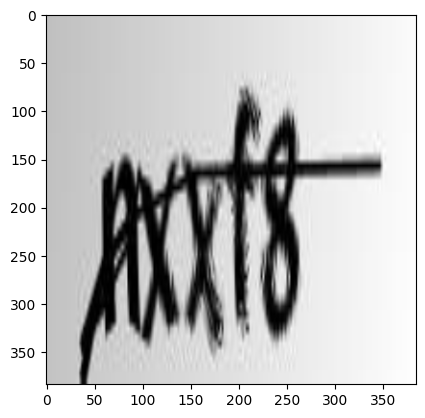

In [9]:


img = Image.open("./samples/nxxf8.png").convert('RGB')
img = img.resize((384, 384), Image.BILINEAR)
label = 'nxxf8'
encod_label = encoder.transform(list(label))
print(encod_label)
print(encoder.inverse_transform(encod_label))
print(img.size)
plt.imshow(img, 'gray')
plt.show()

In [11]:
transform_list = transforms.Compose([
               #transforms.Grayscale(1),
               #transforms.Resize((224, 224)),
               transforms.ToTensor(), 
               transforms.Normalize([0.5], [0.5]) 
])

img_tensor = transform_list(img)
img_tensor = torch.unsqueeze(img_tensor, 0)
#im = img_transform(im).unsqueeze(0).to(device).float()

img_tensor.shape

torch.Size([1, 3, 384, 384])

In [86]:
model = VitModel(63)
model(img_tensor)

tensor([[ 0.0131, -0.0154,  0.1367, -0.0276,  0.0235]],
       grad_fn=<SqueezeBackward1>)

In [82]:
model

VitModel(
  (vit_net): VisionTransformer(
    (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (encoder): Encoder(
      (dropout): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (encoder_layer_0): EncoderBlock(
          (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (self_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (dropout): Dropout(p=0.0, inplace=False)
          (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (0): Linear(in_features=768, out_features=3072, bias=True)
            (1): GELU(approximate='none')
            (2): Dropout(p=0.0, inplace=False)
            (3): Linear(in_features=3072, out_features=768, bias=True)
            (4): Dropout(p=0.0, inplace=False)
          )
        )
        (encoder_layer_1): EncoderBlock(
          (ln_1): Laye

In [3]:
from transformers import TrOCRProcessor
path_trocr_repo =  "microsoft/trocr-base-handwritten"
processor = TrOCRProcessor.from_pretrained(path_trocr_repo)

C:\Users\Oleg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'paths' is not defined

In [2]:
!pip install transformers

     ---------------------------------------- 7.5/7.5 MB 10.9 MB/s eta 0:00:00
     -------------------------------------- 268.4/268.4 KB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 11.6 MB/s eta 0:00:00
     ------------------------------------- 266.6/266.6 KB 16.0 MB/s eta 0:00:00
     ------------------------------------- 268.8/268.8 KB 16.2 MB/s eta 0:00:00
     -------------------------------------- 163.8/163.8 KB 9.6 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Oleg\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [1]:
!pip install -q transformers

You should consider upgrading via the 'C:\Users\Oleg\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [68]:
from transformers import TrOCRProcessor
from transformers import VisionEncoderDecoderModel
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# to prepare the data for the model.
# TrOCRProcessor is actually just a wrapper around a ViTFeatureExtractor (which can be used to resize + normalize images) and 
# a RobertaTokenizer (which can be used to encode and decode text into/from input_ids).

image_processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-stage1")
#model.to(device)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-stage1 and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
device

device(type='cuda')

In [9]:
from PIL import Image
image = Image.open('./samples/2b827.png').convert("RGB")

pixel_values = image_processor(image, return_tensors="pt").pixel_values
#pixel_values = pixel_values.squeeze
pixel_values = pixel_values.to(device)

generated_ids = model.generate(pixel_values)

In [10]:
generated_ids

tensor([[    2, 31145,  2518,     2]], device='cuda:0')

In [11]:
pred_str = image_processor.batch_decode(generated_ids, skip_special_tokens=True)
pred_str

['26827']

Data analysis

In [33]:
# Check the length of label is equal 5 always
img_path = "./samples/"
i = 0
images = os.listdir(img_path)
for image_name in images:
    label = image_name.split('.')[0]
    if len(label) != 5:
        i +=1
print(i)
len(images)

0


1070

Dataset validation

In [1]:
from PIL import Image
import torch
from torch.utils.data import Dataset,TensorDataset, DataLoader,  SubsetRandomSampler
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
import time

import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [11]:
class textDataset(Dataset):
    def __init__(self, imgdir, label_encoding, transforms=False):
        #super(SynthDataset, self).__init__()
        self.path = imgdir
        self.images = sorted(os.listdir(self.path))
        self.nSamples = len(self.images)
        self.label_encoding = label_encoding
        self.transform = transforms
        self.processor = label_encoding
        self.max_target_length = 5
        
        #f = lambda x: os.path.join(self.path, x)
        #self.imagepaths = list(map(f, self.images))

        #self.collate_fn = SynthCollator()

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        assert index <= len(self), 'index range error'
        image_name = self.images[index]
 
        imagepath = os.path.join(self.path, image_name)

        img = Image.open(imagepath).convert('RGB') # 4d (+transparency layer) -> 3d 
        #pixel_values = self.processor(img, return_tensors="pt").pixel_values
        #img = np.array(img) # 3d -> 2d
        if self.transform:
            img = self.transform(img)
        item = {'img': img, 'idx':index}

        label = image_name.split('.')[0] #label has 5 symbols always
        label = torch.from_numpy(self.label_encoding.transform(list(label))).type(torch.float32) #long
        
        #labels = self.processor.tokenizer(label, padding="max_length", 
        #                                  max_length=self.max_target_length).input_ids

        item['label'] = label #torch.tensor(labels)
        
        return item

In [12]:
unique_chars = [line.strip() for line in open("EN_symbol_dict.txt", 'r')]
VOCAB_SIZE = len(unique_chars) #  62 symbols
id_to_ch = dict(enumerate(unique_chars))
ch_to_id = {ch: i for i, ch in id_to_ch.items()}

encoder = LabelEncoder()
encoder.fit(unique_chars)

img_transform = transforms.Compose([
        transforms.Resize((384, 384), interpolation=3),
        transforms.ToTensor(),
        transforms.Normalize(0.5, 0.5)
    ])

img_path = "./samples/"

#image_label_processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")

dataset = textDataset(img_path,label_encoding=encoder, transforms=img_transform)

In [10]:
dataset[0]

./samples/226md.png


{'img': tensor([[[0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
          [0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
          [0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
          ...,
          [0.5294, 0.5294, 0.5294,  ..., 0.9922, 0.9922, 0.9922],
          [0.5294, 0.5294, 0.5294,  ..., 0.9922, 0.9922, 0.9922],
          [0.5294, 0.5294, 0.5294,  ..., 0.9922, 0.9922, 0.9922]],
 
         [[0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
          [0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
          [0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
          ...,
          [0.5294, 0.5294, 0.5294,  ..., 0.9922, 0.9922, 0.9922],
          [0.5294, 0.5294, 0.5294,  ..., 0.9922, 0.9922, 0.9922],
          [0.5294, 0.5294, 0.5294,  ..., 0.9922, 0.9922, 0.9922]],
 
         [[0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
          [0.5059, 0.5059, 0.5059,  ..., 0.9686, 0.9686, 0.9686],
          [0.5059, 0.5059, 0.5059

In [65]:
for i in range(len(dataset)):
    print(dataset[i]['label'])
    if i == 3:
        break



tensor([ 3.,  3.,  7., 49., 40.])
tensor([ 3.,  3., 40.,  6., 50.])
tensor([ 3.,  4.,  6.,  7., 43.])
tensor([ 3.,  4., 49., 40., 43.])


In [13]:

data_size = len(dataset) # 1070
validation_fraction = .25


val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

# Notice that we create test data loader in a different way. We don't have the labels.
#test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)


#transform_list =  [transforms.Grayscale(1),
#                    transforms.Resize((28, 28))]
#                    #transforms.ToTensor()]
                    #transforms.Normalize((0.5,), (0.5,))]
#transform2 = transforms.Compose(transform_list)


train_loader = torch.utils.data.DataLoader(dataset, batch_size=4,sampler=train_sampler, num_workers=0)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=4, sampler=val_sampler, num_workers=0)

print(len(train_loader))
print(len(val_loader))

201
67


In [14]:
for x in train_loader:
    print(x['img'].shape, x['label'])
    break
#for x in val_loader:
#    print(x['img'].shape, x['label'].shape)
#    break

torch.Size([4, 3, 384, 384]) tensor([[ 8.,  7.,  4.,  5., 61.],
        [49., 59., 40., 42.,  7.],
        [41., 50.,  4.,  3., 41.],
        [ 8.,  8., 59., 52.,  5.]])


In [17]:
import torch.nn.functional as F
VOCAB_SIZE = 64
class Model1(torch.nn.Module):
    def __init__(self, dim, dim_out):
        super(Model1, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, dim, 5, stride=2, padding=2), # (N-F)/stride +1
            nn.BatchNorm2d(dim),
            nn.MaxPool2d(3, stride=2, padding=1),
            nn.Conv2d(dim, dim*2, 3, padding=1),
            nn.BatchNorm2d(dim*2),
            nn.Dropout(0.1),
            nn.Conv2d(dim*2, dim*4, 3, padding=1),
            nn.BatchNorm2d(dim*4),
            nn.Dropout(0.1),
            nn.Conv2d(dim*4, dim*8, 3, padding=1)
        )
        self.fc1 = nn.Linear(dim*8*13, VOCAB_SIZE ) # 7
        #self.rnn = nn.LSTM(dim*4, dim*2, 2, bidirectional=True, batch_first=True)
        #self.fc2 = nn.Linear(dim*2*2, dim_out)
        #self.pool = nn.AdaptiveAvgPool1d(5)

    def forward(self, x):
        bs, _, _, _ = x.size()
        x = self.conv(x)
        #x = x.permute(0, 3, 1, 2)
        #x = x.view(bs, x.size(1), -1)
        #x = self.fc1(x)
        #x = F.relu(x)
        #x, _ = self.rnn(x)
        #x = self.fc2(x).transpose(1, 2)
        #x = self.pool(x)

        return x
model = Model1(dim=64, dim_out=63)

for i, batch in enumerate(train_loader):
    x, y = batch['img'], batch['label']
    
    #x = x.view(x.size(0), x.size(2), x.size(3))
    #print(x.shape)
    #print(len(y[0]))
    pred = model(x)

In [15]:
from transformers import TrOCRProcessor
from transformers import VisionEncoderDecoderModel
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# to prepare the data for the model.
# TrOCRProcessor is actually just a wrapper around a ViTFeatureExtractor (which can be used to resize + normalize images) and 
# a RobertaTokenizer (which can be used to encode and decode text into/from input_ids).

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-stage1")
#model.to(device)

#model
model.config.max_length = 5
model.config.decoder.vocab_size = 63
model.config.early_stopping = True

model.decoder.output_projection = nn.Linear(in_features=1024, out_features=63, bias=False)

NameError: name 'VisionEncoderDecoderModel' is not defined

In [114]:
model.config

VisionEncoderDecoderConfig {
  "_name_or_path": "microsoft/trocr-base-stage1",
  "architectures": [
    "VisionEncoderDecoderModel"
  ],
  "decoder": {
    "_name_or_path": "",
    "activation_dropout": 0.0,
    "activation_function": "relu",
    "add_cross_attention": true,
    "architectures": null,
    "attention_dropout": 0.0,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": 0,
    "chunk_size_feed_forward": 0,
    "classifier_dropout": 0.0,
    "cross_attention_hidden_size": 768,
    "d_model": 1024,
    "decoder_attention_heads": 16,
    "decoder_ffn_dim": 4096,
    "decoder_layerdrop": 0.0,
    "decoder_layers": 12,
    "decoder_start_token_id": 2,
    "diversity_penalty": 0.0,
    "do_sample": false,
    "dropout": 0.1,
    "early_stopping": false,
    "encoder_no_repeat_ngram_size": 0,
    "eos_token_id": 2,
    "exponential_decay_length_penalty": null,
    "finetuning_task": null,
    "forced_bos_token_id": null,
    "forced_eos_token_id": nul

In [123]:
for i, batch in enumerate(train_loader):
    x, y = batch['img'], batch['label']
    
    #x = x.view(x.size(0), x.size(2), x.size(3))
    #print(x.shape)
    #print(len(y[0]))
    print(batch['label'])
    generated_ids = model(**batch)
    
    break
    

tensor([[ 3., 50., 52., 43.,  7.],
        [60.,  4.,  5.,  8., 50.],
        [ 9., 39., 49.,  5.,  7.],
        [40., 41.,  5.,  6., 60.]])


ValueError: You have to specify pixel_values

In [121]:
generated_ids.loss

AttributeError: 'Tensor' object has no attribute 'loss'

20